<a href="https://colab.research.google.com/github/masa512/PCA/blob/main/GMM_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm


# Part 1 : Generating gaussian sampled data from N distributions 
(we'll say N for now)

In [279]:
n_components = 3
means = np.random.randint(low=-5, high=5, size=(n_components,))
variances = 2*np.random.rand(n_components)
cluster_sizes = np.random.randint(low=20, high=50, size=(n_components,))
print(means)
print(variances)
print(cluster_sizes)

[ 3 -4  1]
[0.16930498 0.73589178 1.98157976]
[39 33 27]


In [280]:
# We will generate data from each cluster

D = [np.random.normal(loc=m, scale=math.sqrt(s), size=(cs,)) for cs,m,s in zip(cluster_sizes,means,variances)]

# Each element of D has data sampled by kth cluster

In [281]:
print(D[0].shape)
print(D[1].shape)


(39,)
(33,)


Text(0.5, 1.0, 'Scatter plot of the original data with proper label')

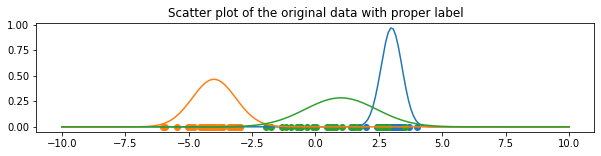

In [282]:
# We can plot the data in a scatter plot in different color
x_axis = np.linspace(start = -10, stop = 10, num = 200)

f = plt.figure(figsize=(10,2))
for k in range(len(D)):
  plt.scatter(D[k],np.zeros_like(D[k]))
  plt.plot(x_axis, norm.pdf(x_axis, means[k], math.sqrt(variances[k])))
# We can also plot the gaussian on top 

plt.title('Scatter plot of the original data with proper label')



# Part 2 : GMM modeling sequence

In [283]:
def E_step(D,M,V,Pi):
  # Lets approach with a different method ( using i j)

  gamma = np.array([[norm(M[j],math.sqrt(V[j])).pdf(D[i]) for i in range(D.shape[0])] for j in range(M.shape[0])])
  sum_gamma = np.sum(gamma,axis=0,keepdims=True)
  return gamma/sum_gamma

def eval_mean(gamma,D):
  # D has shape [ND,] and gamma has shape [NC,ND]
  num = np.sum(np.array([gamma[:,i]*D[i] for i in range(gamma.shape[1])]),axis=0,keepdims=False)
  den = np.sum(gamma,axis=1,keepdims=False)
  print(num/den)
  return num/den

def eval_std(gamma,M,D):
  # D is shape [ND x 1]
  # M is shape [NC x 1]
  # gamma is shape [NC,ND]

  num = np.array([[gamma[j,i]*(D[i]-M[j])*(D[i]-M[j]) for i in range(D.shape[0])] for j in range(gamma.shape[0])]) 
  num = np.sum(num,axis=1,keepdims=False)
  den = np.sum(gamma,axis=1,keepdims=False)
  return num/den

def eval_pi(gamma):
  N = gamma.shape[1]
  return 1/N*np.sum(gamma,axis=1,keepdims=True)


class GMM_1D:

  def __init__(self,n_components):
    self.nc = n_components
    # initialize mean,variance,pi
    self.M = np.random.randint(low=-5, high=5, size=(self.nc,))
    self.V = np.random.rand(self.nc)
    self.Pi = 1/self.nc*np.ones((self.nc))  
    
  
  def load_data(self,D):

    # Takes data as a form of 1D array (N_data,)
    self.D = D
    self.gamma = np.zeros((self.nc,self.D.shape[0]))
  
  def forward(self):

    # Contribution from E step
    gamma = E_step(self.D,self.M,self.V,self.Pi)
    self.gamma = gamma
    # backprop to retrieve the new mean,variance,pi
    self.M = eval_mean(gamma,self.D).reshape((-1,))
    self.V = eval_std(gamma,self.M,self.D).reshape((-1,))
    self.Pi = eval_pi(gamma).reshape((-1,))
    
  def inference(self):

    # Observe the data's Gamma matrix (Ncluster X Ndata)
    # Return the argmax of the data given the pre-saved data
    # This would serve as a classification label for that data

    return np.argmax(self.gamma,axis=0) 
    


In [284]:
# Initiate gmm model
model = GMM_1D(n_components)

# Load the data into model
data = np.concatenate(D,axis=0)
model.load_data(data)


In [285]:
# We will do just one forward pass to debug the model

N_epochs = 40
for _ in range(N_epochs):
  model.forward()

[-3.66295428  2.24653093  2.52296969]
[-3.66720698  1.89397478  2.76654016]
[-3.74622235  1.54286006  2.91440383]
[-3.84397954  1.22898015  2.99065505]
[-3.92683632  1.01592033  3.01630031]
[-3.98181618  0.89023645  3.02110062]
[-4.01294724  0.81118014  3.02136395]
[-4.02903697  0.76059496  3.02095287]
[-4.03714835  0.72897416  3.02059372]
[-4.04133901  0.70963909  3.02035882]
[-4.04359675  0.69797107  3.02021466]
[-4.04486014  0.69097617  3.02012712]
[-4.04558652  0.68679511  3.02007377]
[-4.04601144  0.68429885  3.02004108]
[-4.04626261  0.68280895  3.02002099]
[-4.04641199  0.68191967  3.02000861]
[-4.04650115  0.68138877  3.02000098]
[-4.04655448  0.68107174  3.01999629]
[-4.04658642  0.68088238  3.0199934 ]
[-4.04660555  0.68076924  3.01999163]
[-4.04661703  0.68070162  3.01999055]
[-4.04662391  0.6806612   3.01998989]
[-4.04662803  0.68063704  3.01998948]
[-4.04663051  0.68062259  3.01998924]
[-4.04663199  0.68061394  3.01998909]
[-4.04663288  0.68060877  3.019989  ]
[-4.04663342

Text(0.5, 1.0, 'Scatter plot of the original data with proper label')

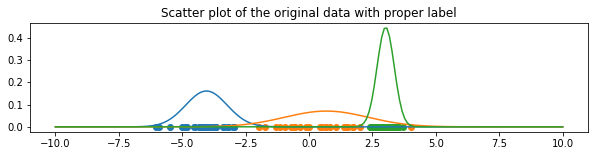

In [287]:
# Since we have the correct associations
labels = model.inference()

# We will now partition the data in the labels
partitioned_data = [data[labels == k] for k in range(n_components)]

# We can plot the data in a scatter plot in different color
x_axis = np.linspace(start = -10, stop = 10, num = 200)

f = plt.figure(figsize=(10,2))
for k in range(n_components):
  plt.scatter(partitioned_data[k],np.zeros_like(partitioned_data[k]))
  plt.plot(x_axis, model.Pi[k] * norm.pdf(x_axis, model.M[k], math.sqrt(model.V[k])))
# We can also plot the gaussian on top 

plt.title('Scatter plot of the original data with proper label')

